Importamos las librerías

In [1]:
import numpy as np
import matplotlib.pylab as plt

#Volcado de datos
Una primera revisión sobre este conjunto de datos nos permite ver que es un csv separado por comas. No obstante, entre los datos aparecen direcciones que incluyen comas. Por este motivo, el primer paso que llevaremos a cabo es la modificación de las comas de las direcciones. 

Es fácil darse cuenta que todas las direcciones se escriben con coma seguida de espacio, por lo que para hacer esta modificación será suficiente con abrir el fichero, recorrerlo linea por linea con un fotr y, usando la función replace, substituir ", " por ";". La modificación de estos datos la guardaremos en un fichero distinto que llamaremos datosB.csv.

In [2]:
with open("./data/Speculation_Watch_List.csv","r") as f1:
  with open("./data/datosB.csv","w") as f2:
    for i in f1:
      n=i.replace(", ", ";")
      f2.write(n)

Mostramos los datos por pantalla para comprobar que se ha realizado correctamente, al igual que el número de filas (ya que es un valor fácil de mirar en el dataset origial para comprobr que coiciden).

In [ ]:
aux=0
with open("data/datosB.csv","r") as f2:
    for n in f2:
        aux+=1
        print(n)
        
    print(aux)

De todos los datos que aparecen en el dataset solo vamos a usar el barrio, el precio de las viviendas y la tasa de capitalización, por lo que solo guardaremos las columnas de estas variables (que son la 1, la 11 y la 12). Además, al igual que antes, nos saltaremos la primera fila que es la que incluye los nombres de las columnas.

A parte, nos guardaremos los nombres de de los barrios en la variable col_bor, que están en la columna 0 del conjunto de datos, usando dtype=str.

In [4]:
data=np.loadtxt('./data/datosB.csv', delimiter=",", usecols=(1,11,12), skiprows=1)
col_bor=np.loadtxt('./data/datosB.csv', delimiter=",", usecols=(0), skiprows=1, dtype=str)

Para poder hacer estudios por barrios, necesitamos saber en que índices de nuestro conjunto de datos se encuentra cada barrio. Para ello crearemos un diccionario que nos diga para cada barrio que filas del dataset tenemos que mirar.

In [ ]:
#Listado de barrios
borough=np.unique(col_bor)
#Diccionario con los indices que corresponde a cada barrio
ind_dicc={}
for i in range(len(borough)):
  ind_dicc[borough[i]]=np.where(col_bor==borough[i])
print(ind_dicc)

#Análisis de los datos
El primer indicador que estudiaremos es el precio medio y la desviación típica para cada barrio:

In [7]:
#Calculo de la media y desviacion tipica de precios por barrio
media_precio=[]
for i in range(len(borough)):
  media=round(np.mean(data[ind_dicc[borough[i]], 1]),2)
  desv=round(np.std(data[ind_dicc[borough[i]], 1]),2)
  media_precio.append(media)
  print(f"En el barrio {borough[i]} tenemos un precio medio de {media}$, con una desviación típica de {desv}")

En el barrio BK tenemos un precio medio de 8691022.11$, con una desviación típica de 7989399.88
En el barrio BX tenemos un precio medio de 6659420.79$, con una desviación típica de 4400425.32
En el barrio MN tenemos un precio medio de 12382693.45$, con una desviación típica de 12075467.3
En el barrio QN tenemos un precio medio de 9266994.21$, con una desviación típica de 9494142.08
En el barrio SI tenemos un precio medio de 2206250.0$, con una desviación típica de 1088343.78


Dibujemos la gráfica de este precio medio por barrio calculado:

<function matplotlib.pyplot.show(*args, **kw)>

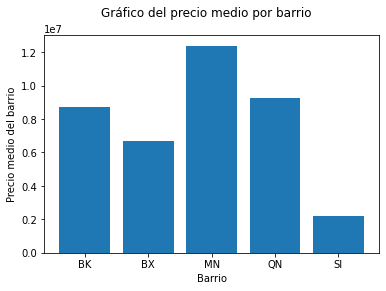

In [8]:
#Gráfico de las medias de precio por barrio
fig, ax=plt.subplots()
ax.set_xlabel("Barrio")
ax.set_ylabel("Precio medio del barrio")
plt.suptitle("Gráfico del precio medio por barrio")
plt.bar(borough, media_precio)
plt.show

El segundo indicador serán los cuartiles del precio para cada barrio:

In [9]:
#Cuartiles de precios por barrio
for i in borough:
  q1=round(np.percentile(data[ind_dicc[i],1], 25), 2)
  q2=round(np.percentile(data[ind_dicc[i],1], 50), 2)
  q3=round(np.percentile(data[ind_dicc[i],1], 75), 2)
  print(f'Los cuartiles de precio para el barrio {i} son: Q1={q1}  Q2={q2}  Q3={q3}')

Los cuartiles de precio para el barrio BK son: Q1=4087500.0  Q2=6325000.0  Q3=9750000.0
Los cuartiles de precio para el barrio BX son: Q1=3500000.0  Q2=5600000.0  Q3=8250000.0
Los cuartiles de precio para el barrio MN son: Q1=6056250.0  Q2=8560193.0  Q3=14531250.0
Los cuartiles de precio para el barrio QN son: Q1=3950000.0  Q2=5168000.0  Q3=10904167.0
Los cuartiles de precio para el barrio SI son: Q1=1287500.0  Q2=2100000.0  Q3=3018750.0


Pasemos ahora a calcular la media de la tasa de capitalización por barrios y su desviación típica:

In [10]:
#Media y desviacion tipica de la tasa de capitalizacion por barrios
media_caprate=[]
for i in range(len(borough)):
  media=round(np.mean(data[ind_dicc[borough[i]], 2]),4)
  desv=round(np.std(data[ind_dicc[borough[i]], 2]),4)
  media_caprate.append(media)
  print(f"En el barrio {borough[i]} tenemos una tasa de capitalización media de {media}, con una desviación típica de {desv}")

En el barrio BK tenemos una tasa de capitalización media de 0.0342, con una desviación típica de 0.0098
En el barrio BX tenemos una tasa de capitalización media de 0.0345, con una desviación típica de 0.0067
En el barrio MN tenemos una tasa de capitalización media de 0.0326, con una desviación típica de 0.0112
En el barrio QN tenemos una tasa de capitalización media de 0.0343, con una desviación típica de 0.0087
En el barrio SI tenemos una tasa de capitalización media de 0.0498, con una desviación típica de 0.0107


Para poder interpretar más rápidamente estos resultados miremos el gráfico de la tasa de capitalización media:

<function matplotlib.pyplot.show(*args, **kw)>

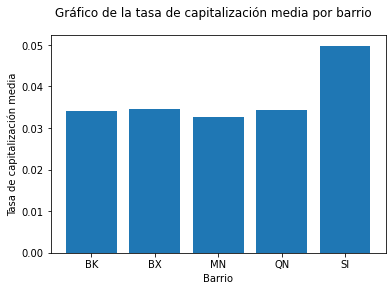

In [11]:
#Gráfico de las medias de tasa de capitalizacion por barrio
fig, ax=plt.subplots()
ax.set_xlabel("Barrio")
ax.set_ylabel("Tasa de capitalización media")
plt.suptitle("Gráfico de la tasa de capitalización media por barrio")
plt.bar(borough, media_caprate)
plt.show

Finalmente, calcularemos el máximo y el mínimo de la tasa de capitalización para cada barrio, junto al precio que tiene la vivienda con esa tasa de capitalización:

In [12]:
#Pisos con mayor tasa de capitalizacion por barrio y su precio
max_cap=[]
min_cap=[]
for i in range(len(borough)):
  max=round(np.max(data[ind_dicc[borough[i]], 2]),4)
  max_cap.append(max)
  indice_max=np.where(data[ind_dicc[borough[i]][0],2]==max)[0]
  precio_max=data[indice_max,1]
  min=round(np.min(data[ind_dicc[borough[i]], 2]),4)
  min_cap.append(min)
  indice_min=np.where(data[ind_dicc[borough[i]][0],2]==min)[0]
  precio_min=data[indice_min,1]
  print(f"En el barrio {borough[i]} tenemos una tasa de capitalización máxima de {max}\nEl precio del/los piso/s con esta tasa es de: {precio_max}\n")
  print(f"En el barrio {borough[i]} tenemos una tasa de capitalización mínima de {min}\nEl precio del/los piso/s con esta tasa es de: {precio_min}\n")

En el barrio BK tenemos una tasa de capitalización máxima de 0.063
El precio del/los piso/s con esta tasa es de: [2375000.]

En el barrio BK tenemos una tasa de capitalización mínima de 0.012
El precio del/los piso/s con esta tasa es de: [6800000.]

En el barrio BX tenemos una tasa de capitalización máxima de 0.047
El precio del/los piso/s con esta tasa es de: [3200000. 3310000. 8250000.]

En el barrio BX tenemos una tasa de capitalización mínima de 0.019
El precio del/los piso/s con esta tasa es de: [15000000.]

En el barrio MN tenemos una tasa de capitalización máxima de 0.056
El precio del/los piso/s con esta tasa es de: [9600000. 8595386.]

En el barrio MN tenemos una tasa de capitalización mínima de 0.008
El precio del/los piso/s con esta tasa es de: [4800000.]

En el barrio QN tenemos una tasa de capitalización máxima de 0.055
El precio del/los piso/s con esta tasa es de: [2600000.]

En el barrio QN tenemos una tasa de capitalización mínima de 0.015
El precio del/los piso/s con e

Hagamos el gráfico para verlo mejor:

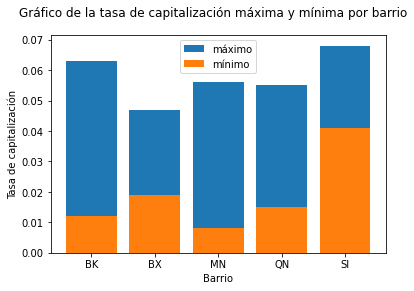

In [13]:
#Gráfico de capitañizacion maxima y minima por barrio
fig, ax=plt.subplots()
ax.set_xlabel("Barrio")
ax.set_ylabel("Tasa de capitalización")
plt.suptitle("Gráfico de la tasa de capitalización máxima y mínima por barrio")
plt.bar(borough, max_cap, label="máximo")
plt.bar(borough, min_cap, label="mínimo")
ax.legend()
plt.show()